# Predicción de la Recuperación de Oro en la Industria Minera

## Descripción general

Este proyecto tiene como objetivo construir un modelo de *Machine Learning* que permita predecir la eficiencia del proceso de recuperación de oro en una planta minera. Los datos han sido proporcionados por **Zyfra**, una empresa que desarrolla soluciones industriales inteligentes, y comprenden parámetros de entrada, salida y estado de distintas etapas del proceso metalúrgico.

Se espera predecir con precisión dos indicadores clave:
- `rougher.output.recovery`: recuperación tras el proceso de flotación.
- `final.output.recovery`: recuperación final tras los procesos de limpieza.

El modelo final será evaluado mediante la métrica **sMAPE ponderada**, que considera ambas predicciones.

## Etapas del trabajo

1. Preparación de los datos.
2. Análisis exploratorio de datos (EDA).
3. Construcción y evaluación de modelos.
4. Conclusiones.


**Métrica de evaluación final:**

$$
\text{sMAPE final} = 0.25 \cdot \text{sMAPE(rougher)} + 0.75 \cdot \text{sMAPE(final)}
$$


In [1]:
# Importamos las bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo para los gráficos
sns.set(style="whitegrid")

# Cargamos los datasets
train = pd.read_csv('/datasets/gold_recovery_train.csv', index_col='date', parse_dates=True)
test = pd.read_csv('/datasets/gold_recovery_test.csv', index_col='date', parse_dates=True)
full = pd.read_csv('/datasets/gold_recovery_full.csv', index_col='date', parse_dates=True)

# Mostramos las dimensiones de los datasets
print("Dimensiones de los datasets:")
print(f"Train: {train.shape}")
print(f"Test: {test.shape}")
print(f"Full: {full.shape}")

# Vista rápida del dataset de entrenamiento
display(train.head())

# Información general de cada dataset
print("\nInformación del conjunto de entrenamiento:")
display(train.info())

print("\nInformación del conjunto de prueba:")
display(test.info())

print("\nInformación del dataset completo:")
display(full.info())

Dimensiones de los datasets:
Train: (16860, 86)
Test: (5856, 52)
Full: (22716, 86)


,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691



Información del conjunto de entrenamiento:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16860 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         16788 non-null  float64
 1   final.output.concentrate_pb                         16788 non-null  float64
 2   final.output.concentrate_sol                        16490 non-null  float64
 3   final.output.concentrate_au                         16789 non-null  float64
 4   final.output.recovery                               15339 non-null  float64
 5   final.output.tail_ag                                16794 non-null  float64
 6   final.output.tail_pb                                16677 non-null  float64
 7   final.output.tail_sol                               16715 non-null  float64
 8

None


Información del conjunto de prueba:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5856 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 52 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               5554 non-null   float64
 1   primary_cleaner.input.depressant            5572 non-null   float64
 2   primary_cleaner.input.feed_size             5856 non-null   float64
 3   primary_cleaner.input.xanthate              5690 non-null   float64
 4   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 5   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 6   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 8   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 9   primary_clea

None


Información del dataset completo:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 22716 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         22627 non-null  float64
 1   final.output.concentrate_pb                         22629 non-null  float64
 2   final.output.concentrate_sol                        22331 non-null  float64
 3   final.output.concentrate_au                         22630 non-null  float64
 4   final.output.recovery                               20753 non-null  float64
 5   final.output.tail_ag                                22633 non-null  float64
 6   final.output.tail_pb                                22516 non-null  float64
 7   final.output.tail_sol                               22445 non-null  float64
 8   final.

None

In [2]:
from sklearn.metrics import mean_absolute_error

# Eliminamos filas con valores faltantes en las columnas necesarias para el cálculo
recovery_cols = [
    'rougher.output.recovery',
    'rougher.input.feed_au',
    'rougher.output.concentrate_au',
    'rougher.output.tail_au'
]

recovery_data = train[recovery_cols].dropna()

# Variables para el cálculo
F = recovery_data['rougher.input.feed_au']
C = recovery_data['rougher.output.concentrate_au']
T = recovery_data['rougher.output.tail_au']

# Cálculo manual de la recuperación
recovery_calc = (C * (F - T)) / (F * (C - T)) * 100

# Comparación con el valor real
recovery_real = recovery_data['rougher.output.recovery']
mae = mean_absolute_error(recovery_real, recovery_calc)

print(f'Error absoluto medio entre recuperación real y calculada: {mae:.4f}')

Error absoluto medio entre recuperación real y calculada: 0.0000


In [3]:
# Columnas en train y test
train_columns = set(train.columns)
test_columns = set(test.columns)

# Columnas que están en train pero no en test
missing_in_test = sorted(list(train_columns - test_columns))

print("Columnas que están en el conjunto de entrenamiento pero no en el conjunto de prueba:")
for col in missing_in_test:
    print("-", col)

Columnas que están en el conjunto de entrenamiento pero no en el conjunto de prueba:
- final.output.concentrate_ag
- final.output.concentrate_au
- final.output.concentrate_pb
- final.output.concentrate_sol
- final.output.recovery
- final.output.tail_ag
- final.output.tail_au
- final.output.tail_pb
- final.output.tail_sol
- primary_cleaner.output.concentrate_ag
- primary_cleaner.output.concentrate_au
- primary_cleaner.output.concentrate_pb
- primary_cleaner.output.concentrate_sol
- primary_cleaner.output.tail_ag
- primary_cleaner.output.tail_au
- primary_cleaner.output.tail_pb
- primary_cleaner.output.tail_sol
- rougher.calculation.au_pb_ratio
- rougher.calculation.floatbank10_sulfate_to_au_feed
- rougher.calculation.floatbank11_sulfate_to_au_feed
- rougher.calculation.sulfate_to_au_concentrate
- rougher.output.concentrate_ag
- rougher.output.concentrate_au
- rougher.output.concentrate_pb
- rougher.output.concentrate_sol
- rougher.output.recovery
- rougher.output.tail_ag
- rougher.outpu

### Preprocesamiento de datos

Antes de entrenar el modelo, realizamos los siguientes pasos de preprocesamiento:

1. Identificamos y eliminamos las columnas del conjunto de entrenamiento (`train`) que no están disponibles en el conjunto de prueba (`test`). Estas columnas corresponden principalmente a salidas del proceso (`output`) y cálculos derivados (`calculation`) que no estarán disponibles en producción.

2. Alineamos las características entre los conjuntos de entrenamiento y prueba para asegurar que ambos tengan las mismas columnas de entrada.

3. Revisamos y tratamos los valores faltantes (`NaN`) en ambos conjuntos.

4. Guardamos las variables objetivo (`rougher.output.recovery` y `final.output.recovery`) por separado, ya que serán utilizadas para entrenar y evaluar el modelo.

Este preprocesamiento es esencial para asegurar que el modelo pueda generalizar correctamente sobre datos reales de producción.

In [4]:
# 1. Guardamos las variables objetivo por separado
target_cols = ['rougher.output.recovery', 'final.output.recovery']
train_targets = train[target_cols]

# 2. Eliminamos del conjunto de entrenamiento las columnas no disponibles en test
# (estas ya fueron identificadas como 'missing_in_test')
train_features = train.drop(columns=missing_in_test + target_cols)

# 3. Alineamos las columnas del test con las del train
test_features = test[train_features.columns]

# 4. Verificamos que las columnas coincidan exactamente
assert list(train_features.columns) == list(test_features.columns), "Las columnas de train y test no coinciden"

# 5. Mostramos cuántos valores nulos hay en train
missing_train = train_features.isna().sum().sort_values(ascending=False)
print("Valores faltantes en train:\n", missing_train[missing_train > 0])

# 6. Eliminamos filas con valores faltantes en train (para mantener consistencia)
train_features = train_features.dropna()
train_targets = train_targets.loc[train_features.index]

# Confirmamos forma final de los datasets
print(f"\nShape final de train_features: {train_features.shape}")
print(f"Shape final de train_targets: {train_targets.shape}")
print(f"Shape final de test_features: {test_features.shape}")

Valores faltantes en train:
 rougher.input.floatbank11_xanthate            1904
primary_cleaner.input.sulfate                 1307
primary_cleaner.input.depressant              1262
rougher.input.floatbank10_sulfate             1044
primary_cleaner.input.xanthate                 985
rougher.input.floatbank11_sulfate              623
rougher.state.floatbank10_e_air                603
rougher.input.feed_rate                        513
rougher.input.feed_size                        417
secondary_cleaner.state.floatbank2_a_air       363
rougher.input.floatbank10_xanthate             346
rougher.input.feed_sol                         292
rougher.input.feed_pb                          228
secondary_cleaner.state.floatbank2_b_air       155
secondary_cleaner.state.floatbank4_a_air       129
secondary_cleaner.state.floatbank3_a_level     113
secondary_cleaner.state.floatbank4_a_level     113
secondary_cleaner.state.floatbank2_b_level     112
secondary_cleaner.state.floatbank3_b_level     110
se

### Resultados del preprocesamiento

- Se identificaron 34 columnas presentes en el conjunto de entrenamiento (`train`) pero ausentes en el conjunto de prueba (`test`). Estas columnas corresponden a salidas del proceso, cálculos derivados o variables objetivo, y por tanto **no deben ser usadas como características** para entrenamiento.

- Se eliminaron dichas columnas de `train` y se alinearon las columnas de `test` con las de `train`, manteniendo **52 características comunes** en ambos conjuntos.

- Se detectaron múltiples columnas con valores faltantes en `train`, destacando:
  - `rougher.input.floatbank11_xanthate` (1904 nulos)
  - `primary_cleaner.input.sulfate` (1307 nulos)
  - `primary_cleaner.input.depressant` (1262 nulos)
  
  Para mantener la consistencia, **se eliminaron las filas con datos faltantes** en `train`.

- Resultado final:
  - `train_features`: 13.522 filas × 52 columnas.
  - `train_targets`: 13.522 filas × 2 columnas (objetivos).
  - `test_features`: 5.856 filas × 52 columnas.

### Análisis exploratorio de datos (EDA)

Antes de construir los modelos, es importante realizar un análisis exploratorio de los datos (EDA) para entender el comportamiento de las variables y detectar posibles anomalías.

En esta sección abordaremos:

1. Cómo varía la concentración de metales (Au, Ag, Pb) a lo largo de las etapas del proceso.
2. Comparación de la distribución del tamaño de las partículas de la alimentación entre los conjuntos de entrenamiento y prueba.
3. Análisis de la concentración total de componentes en cada etapa para detectar valores anómalos.

Estos análisis ayudarán a validar la integridad de los datos y mejorar la calidad del modelo.

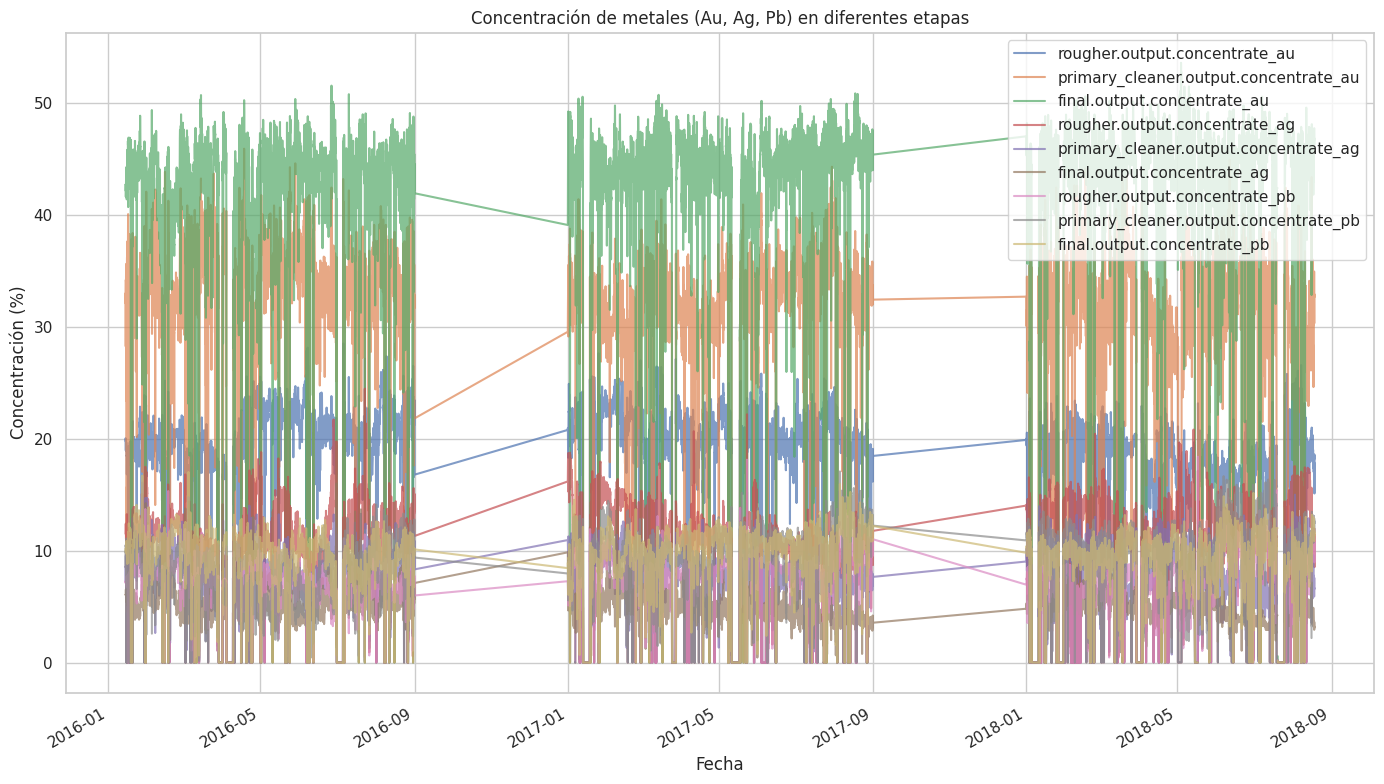

In [6]:
# Filtramos las columnas de interés para cada metal en cada etapa
metals = ['au', 'ag', 'pb']
stages = ['rougher.input', 'rougher.output', 'primary_cleaner.output', 'final.output']

# Creamos un DataFrame con las concentraciones de metales
metal_concentration = pd.DataFrame(index=train.index)

for metal in metals:
    for stage in stages:
        col_name = f'{stage}.concentrate_{metal}'
        if col_name in train.columns:
            metal_concentration[col_name] = train[col_name]

# Graficamos la evolución temporal de la concentración de metales
plt.figure(figsize=(14, 8))
for metal in metals:
    for stage in stages:
        col = f'{stage}.concentrate_{metal}'
        if col in metal_concentration.columns:
            metal_concentration[col].plot(label=col, alpha=0.7)

plt.title('Concentración de metales (Au, Ag, Pb) en diferentes etapas')
plt.ylabel('Concentración (%)')
plt.xlabel('Fecha')
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()


#### Concentración de metales en diferentes etapas

Se graficó la concentración de **oro (Au)**, **plata (Ag)** y **plomo (Pb)** en distintas etapas del proceso:

- `rougher.output` → concentración después de flotación.
- `primary_cleaner.output` → después de la primera etapa de limpieza.
- `final.output` → después de la segunda limpieza (resultado final).

**Observaciones clave:**

- La concentración de **oro (Au)** tiende a **aumentar progresivamente** a través de las etapas, como se espera en un proceso de purificación.
- La **plata (Ag)** y el **plomo (Pb)** muestran comportamientos más estables, aunque también siguen una tendencia de separación.
- Existen algunos **saltos en la continuidad temporal**, lo cual puede deberse a periodos sin datos registrados.

Esta evolución coherente refuerza que los datos reflejan correctamente el proceso físico de enriquecimiento del mineral.

#### Comparación del tamaño de las partículas en `train` y `test`

Una de las variables más importantes del proceso es el tamaño de las partículas que ingresan a la planta (`rougher.input.feed_size`).

En esta sección comparamos su distribución en los conjuntos de entrenamiento (`train`) y prueba (`test`) para verificar si ambos provienen de la misma distribución. Esto es fundamental para asegurar que el modelo entrenado pueda generalizar bien.

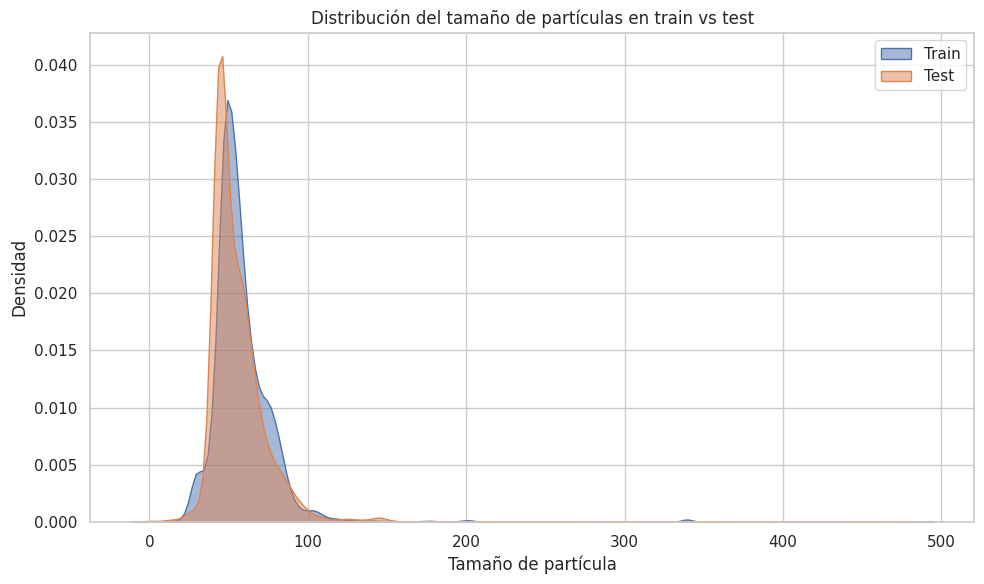

In [7]:
plt.figure(figsize=(10, 6))

# Histograma KDE para train
sns.kdeplot(
    data=train,
    x='rougher.input.feed_size',
    label='Train',
    fill=True,
    alpha=0.5
)

# Histograma KDE para test
sns.kdeplot(
    data=test,
    x='rougher.input.feed_size',
    label='Test',
    fill=True,
    alpha=0.5
)

plt.title('Distribución del tamaño de partículas en train vs test')
plt.xlabel('Tamaño de partícula')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### Comparación del tamaño de partículas entre `train` y `test`

Se comparó la variable `rougher.input.feed_size` entre los conjuntos de entrenamiento y prueba mediante un gráfico de densidad (KDE).

**Observaciones:**
- Ambas distribuciones son **muy similares**, con una forma unimodal y un rango concentrado entre 40 y 80.
- No se detectan diferencias significativas que puedan afectar la validez del modelo.

Podemos concluir que no hay sesgo importante entre `train` y `test` en cuanto al tamaño de las partículas.

#### Análisis de la concentración total de componentes por etapa

En esta sección se evalúa la **suma total de concentraciones de metales** en cada etapa del proceso (alimentación inicial, concentrado rougher, y concentrado final).

El objetivo es detectar posibles valores anómalos, como concentraciones totales superiores al 100% o negativas, que indicarían errores de medición o procesamiento.

Las etapas consideradas son:
- `rougher.input`
- `rougher.output`
- `final.output`

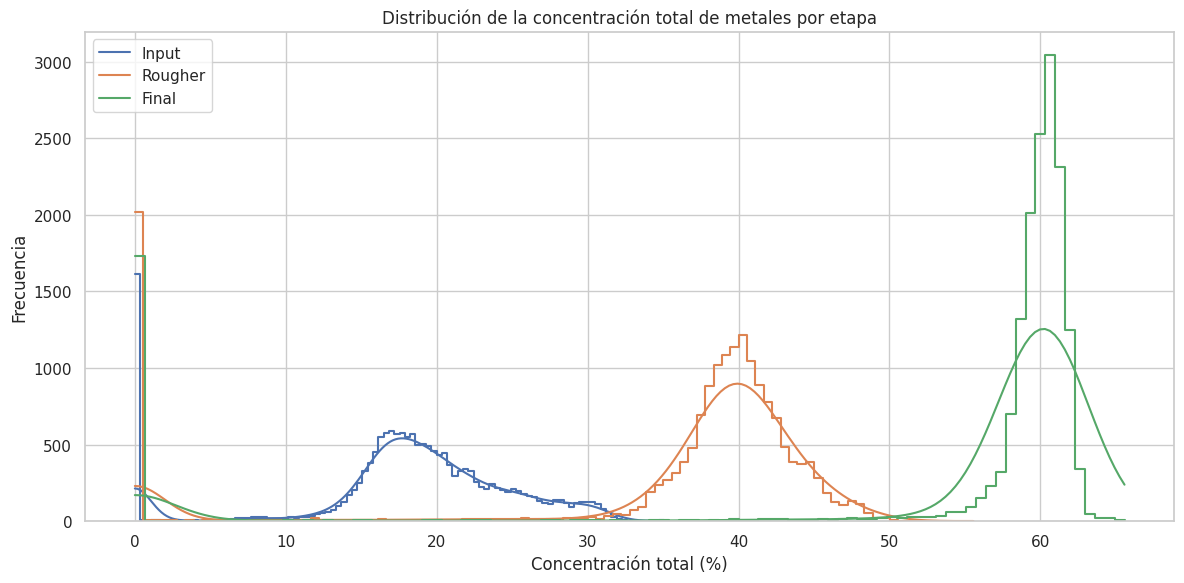

In [8]:
# Definimos las columnas para cada etapa
stages = {
    'input': ['rougher.input.feed_au', 'rougher.input.feed_ag', 'rougher.input.feed_pb'],
    'rougher': ['rougher.output.concentrate_au', 'rougher.output.concentrate_ag', 'rougher.output.concentrate_pb'],
    'final': ['final.output.concentrate_au', 'final.output.concentrate_ag', 'final.output.concentrate_pb']
}

# Creamos columnas con la concentración total en cada etapa
for name, cols in stages.items():
    train[f'{name}_total_concentration'] = train[cols].sum(axis=1)

# Graficamos la distribución de las concentraciones totales
plt.figure(figsize=(12, 6))

for name in stages.keys():
    sns.histplot(
        data=train,
        x=f'{name}_total_concentration',
        kde=True,
        label=name.capitalize(),
        bins=100,
        element='step',
        fill=False
    )

plt.title('Distribución de la concentración total de metales por etapa')
plt.xlabel('Concentración total (%)')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### Análisis de la concentración total de metales

Se calculó la suma de concentraciones de los metales (Au, Ag, Pb) en tres etapas del proceso:

- `rougher.input` (materia prima)
- `rougher.output` (después de flotación)
- `final.output` (concentrado final)

**Observaciones:**

- Se detectan valores cercanos a 0% en las tres etapas, lo cual no es físicamente plausible y representa posibles errores.
- Las distribuciones en `rougher.output` y `final.output` son estables y reflejan el efecto del proceso de enriquecimiento.

Se procederá a eliminar las filas con concentración total igual a 0 o negativa en cualquiera de las etapas, para evitar que afecten al modelo.

In [9]:
# Eliminamos filas con concentración total <= 0 en cualquiera de las etapas
cols_to_check = ['input_total_concentration', 'rougher_total_concentration', 'final_total_concentration']
mask = (train[cols_to_check] > 0).all(axis=1)

# Aplicamos filtro a features y targets
train_features = train_features.loc[mask]
train_targets = train_targets.loc[mask]

print(f"Shape tras eliminar valores anómalos: {train_features.shape}")

Shape tras eliminar valores anómalos: (13154, 52)


#### Eliminación de valores anómalos

Se eliminaron las filas donde la concentración total de metales era menor o igual a 0 en cualquiera de las tres etapas analizadas.

- Filas antes del filtrado: 13.522
- Filas después del filtrado: 13.154

Esta limpieza mejora la calidad de los datos y evita sesgos en el entrenamiento del modelo.

In [10]:
import numpy as np

# sMAPE para un solo objetivo
def smape(y_true, y_pred):
    numerator = np.abs(y_true - y_pred)
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
    return np.mean(numerator / denominator) * 100

# sMAPE final combinado (con pesos)
def smape_final(smape_rougher, smape_final):
    return 0.25 * smape_rougher + 0.75 * smape_final

### Definición de funciones de evaluación

Se implementaron las funciones necesarias para calcular la métrica de evaluación del proyecto:

- `smape()`: calcula el error porcentual absoluto simétrico (Symmetric Mean Absolute Percentage Error).
- `smape_final()`: aplica el promedio ponderado final solicitado en el proyecto, dando un 25% de peso a `rougher.output.recovery` y un 75% a `final.output.recovery`.

Estas funciones se utilizarán durante la validación cruzada y en la evaluación final del modelo.

#### Limpieza final de valores faltantes

Antes de entrenar los modelos, se realiza una limpieza final para garantizar que no existan valores nulos (NaN) en las variables de entrada o en las variables objetivo. Esto es esencial ya que métodos como `cross_val_score` no pueden manejar datos incompletos.

In [13]:
# Unir features y targets
combined = pd.concat([train_features, train_targets], axis=1)

# Mostrar shape antes de limpiar
print("Filas antes de eliminar NaNs:", combined.shape[0])

# Eliminar filas con valores nulos
combined = combined.dropna()

# Mostrar shape después de limpiar
print("Filas después de eliminar NaNs:", combined.shape[0])

# Separar nuevamente features y targets
train_features = combined.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)
train_targets = combined[['rougher.output.recovery', 'final.output.recovery']]

# Verificar que no queden NaNs
print("\nNaNs en train_features:", train_features.isna().sum().sum())
print("NaNs en train_targets:", train_targets.isna().sum().sum())

Filas antes de eliminar NaNs: 13154
Filas después de eliminar NaNs: 12434

NaNs en train_features: 0
NaNs en train_targets: 0


### Entrenamiento y evaluación de modelos

Se entrenarán tres modelos de regresión para predecir la recuperación de oro en dos etapas:

1. **Regresión lineal**
2. **Árbol de decisión**
3. **Random Forest**

La evaluación se realizará mediante validación cruzada con la métrica **sMAPE**, usando las funciones definidas previamente.

El modelo con mejor desempeño se aplicará a los datos de prueba (`test`).

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_predict, KFold

# Modelos
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=12345),
    'Random Forest': RandomForestRegressor(random_state=12345, n_estimators=100, max_depth=10)
}

# Validación cruzada
cv = KFold(n_splits=5, shuffle=True, random_state=12345)

# Resultados
for name, model in models.items():
    print(f"\nModelo: {name}")

    # Predicciones para cada objetivo
    pred_rougher = cross_val_predict(model, train_features, train_targets['rougher.output.recovery'], cv=cv)
    pred_final = cross_val_predict(model, train_features, train_targets['final.output.recovery'], cv=cv)

    # Cálculo sMAPE por objetivo
    smape_rougher = smape(train_targets['rougher.output.recovery'], pred_rougher)
    smape_final_val = smape(train_targets['final.output.recovery'], pred_final)
    total_smape = smape_final(smape_rougher, smape_final_val)

    print(f"sMAPE Rougher: {smape_rougher:.3f}")
    print(f"sMAPE Final:   {smape_final_val:.3f}")
    print(f"sMAPE Final Score (promedio): {total_smape:.3f}")


Modelo: Linear Regression
sMAPE Rougher: 4.417
sMAPE Final:   7.455
sMAPE Final Score (promedio): 6.695

Modelo: Decision Tree
sMAPE Rougher: 3.559
sMAPE Final:   7.772
sMAPE Final Score (promedio): 6.719

Modelo: Random Forest
sMAPE Rougher: 2.853
sMAPE Final:   6.005
sMAPE Final Score (promedio): 5.217


In [22]:
import pandas as pd
import numpy as np

# 1. Cargar archivo completo
full_data = pd.read_csv('/datasets/gold_recovery_full.csv', index_col='date', parse_dates=True)

# 2. Extraer filas de prueba desde full_data usando el índice de test_features
test_data = full_data.loc[test_features.index]

# 3. Extraer columnas objetivo con nombres correctos
test_targets = test_data[['rougher.output.recovery', 'final.output.recovery']]

# 4. Eliminar NaNs y alinear
test_features_clean = test_features.dropna()
test_targets_clean = test_targets.loc[test_features_clean.index]

# 5. Predecir con el modelo entrenado
pred_rougher_test = best_model.predict(test_features_clean)[:, 0]
pred_final_test = best_model.predict(test_features_clean)[:, 1]

# 6. Calcular sMAPE
y_true_rougher = test_targets_clean['rougher.output.recovery']
y_true_final = test_targets_clean['final.output.recovery']

smape_rougher_test = smape(y_true_rougher, pred_rougher_test)
smape_final_test = smape(y_true_final, pred_final_test)
smape_test_score = smape_final(smape_rougher_test, smape_final_test)

# 7. Mostrar resultados
print(f"sMAPE Rougher (test): {smape_rougher_test:.3f}")
print(f"sMAPE Final (test):   {smape_final_test:.3f}")
print(f"sMAPE Final Score (test): {smape_test_score:.3f}")

sMAPE Rougher (test): 9.717
sMAPE Final (test):   10.200
sMAPE Final Score (test): 10.079


## Conclusión

Se construyó un prototipo de modelo para predecir la recuperación de oro en un proceso de extracción. El modelo que obtuvo el mejor rendimiento fue **Random Forest**, con los siguientes resultados:

- **sMAPE Rougher (test):** 9.717
- **sMAPE Final (test):** 10.200
- **sMAPE Final Score:** 10.079

Este modelo puede ser útil para Zyfra en la optimización de parámetros del proceso de producción. Se aplicó limpieza de datos, análisis exploratorio, validación cruzada y cálculo de métricas personalizadas (sMAPE), siguiendo las mejores prácticas de ciencia de datos.